In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import roc_curve

In [2]:
%matplotlib inline

In [178]:
with open("../HPC_results/Results1.json") as infile:
    results = json.load(infile)
    
with open("../HPC_results/Results2.json") as infile:
    results2 = json.load(infile)

In [192]:
with open("../HPC_results/Results3.json") as infile:
    results3 = json.load(infile)
    
with open("../HPC_results/Results3_shuffle.json") as infile:
    results3_shuffle = json.load(infile)

In [195]:
[r["best_bac"] for r in results3]

[0.5824371916759233, 0.5774959614068436, 0.5823624504659812]

In [194]:
[r["best_bac"] for r in results3_shuffle]

[0.5221467249572207, 0.5246248344613956, 0.5035143280107142]

## Plot of losses

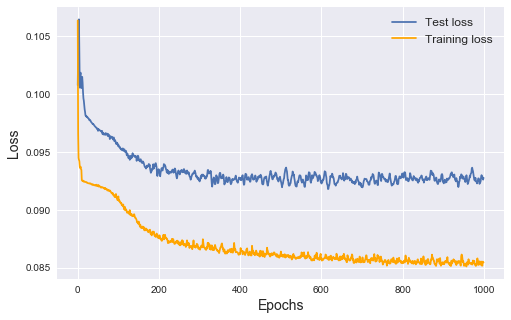

In [71]:
plt.figure(figsize=[8, 5])

i = 0

train_losses = pd.Series(results3[i]["train_losses"])
test_losses = pd.Series(results3[i]["test_losses"])*2

window = 10

smoothed_test_losses = test_losses.rolling(window, center=False, min_periods=1).mean()
smoothed_test_losses[:window] = test_losses[:window]
smoothed_test_losses[1] = smoothed_test_losses[2]

plt.plot(smoothed_test_losses, label="Test loss")
plt.plot(train_losses, label="Training loss", color="orange")

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

#plt.ylim([0.08, 0.11])
plt.legend(fontsize=12)

plt.savefig("/Users/krisj/Documents/PhD/Projects/Thesis/Plots/Deep-learning/Loss-plot.pdf")

In [149]:
[r["best_bac"] for r in results]

[0.5684070577476976, 0.5868610601253053, 0.5748087272590658]

In [ ]:
res = results[3]

In [169]:
output = np.array(res["best_epoch_output"])
predictions = output.round()
real_classes = np.array(res["real_classes"])

assert predictions.shape == real_classes.shape

In [170]:
with open("../Data/Genome-wide/Measured_metabolite_indices.json") as infile:
    data_indices = json.load(infile)

In [203]:
with open("../Data/Genome-wide/Measured_metabolites.json") as infile:
    measured_metabolites = json.load(infile)

In [211]:
with open("../Data/Genome-wide/Ion_to_metabolites.json") as infile:
    ion_to_metabolites = json.load(infile)

In [212]:
ion_to_metabolites

{'10': ['hco3'],
 '1000': ['ocdca'],
 '101': ['ura'],
 '1022': ['sl2a6o'],
 '1026': ['gmhep7p', 'gmhep1p', 's7p'],
 '1027': ['argsuc'],
 '1040': ['acmum'],
 '1054': ['air'],
 '1082': ['4ppan'],
 '1096': ['acgam6p', 'acmanap'],
 '1117': ['23ccmp'],
 '112': ['1pyr5c'],
 '1122': ['23cump'],
 '1129': ['gthrd'],
 '1139': ['acnam'],
 '1164': ['fpram'],
 '117': ['op4en'],
 '1171': ['fgam'],
 '1173': ['dhpt'],
 '1198': ['kdo8p'],
 '1218': ['dtmp'],
 '1223': ['cmp', '3cmp'],
 '1230': ['3ump', 'ump'],
 '124': ['pro__L'],
 '1243': ['dmlz'],
 '1258': ['23camp', 'camp'],
 '1280': ['dimp'],
 '129': ['3mob'],
 '13': ['hco3'],
 '1324': ['tagdp__D', 'fdp'],
 '133': ['aspsa', '2aobut'],
 '1336': ['tre', 'sucr', 'malt', 'lcts', 'melib'],
 '135': ['indole'],
 '1350': ['35cgmp', '23cgmp'],
 '136': ['glyb', 'val__L'],
 '1361': ['amp', '3amp', 'dgmp'],
 '1389': ['arbt6p'],
 '140': ['succ'],
 '1405': ['ametam'],
 '1444': ['cpmp', 'gmp', '3gmp'],
 '1448': ['xmp'],
 '145': ['thr__L', 'hom__L', 'athr__L'],
 '146

In [213]:
for a in measured_metabolites:
    print(a[:-2])

1pyr5c
23camp
23ccmp
23cgmp
23cump
23dhb
23dhmb
23dhmp
23doguln
26dap_LL
26dap__M
2ahbut
2aobut
2ddg6p
2ddglcn
2dh3dgal
2dh3dgal6p
2dhp
2dr1p
2dr5p
2mcacn
2mcit
2me4p
2mecdp
2obut
2oph
2p4c2me
2pg
35cgmp
3amp
3c2hmp
3c3hmp
3c4mop
3cmp
3dhq
3dhsk
3gmp
3hcinnm
3hpp
3hpppn
3mob
3mop
3pg
3ump
4abut
4ahmmp
4ampm
4c2me
4crsol
4hbz
4hoxpacd
4hthr
4mop
4pasp
4ppan
4r5au
5aop
5dh4dglc
6pgl
8aonn
aact
ac
acac
accoa
acetol
acgal
acgam
acgam6p
acglu
acmana
acmanap
acmum
acmum6p
acnam
acon_C
acser
actp
ade
adn
adp
agm
ahcys
ahdt
air
akg
ala_B
ala__D
ala__L
alaala
all__D
altrn
ametam
amp
ara5p
arbt
arbt6p
arg__L
argsuc
asn__L
asp__L
aspsa
athr__L
atp
btal
but
camp
cbasp
cbi
cdp
cechddd
cenchddd
chor
cinnm
cit
citr__L
cmp
cpmp
csn
cys__D
cys__L
cytd
dca
ddca
dgdp
dgmp
dgsn
dgtp
dha
dhap
dhor__S
dhpppn
dhpt
dimp
dmlz
dpcoa
dtbt
dtdpglu
dtdprmn
dtmp
dxyl5p
e4p
enter
f1p
f6p
fc1p
fdp
fgam
fpram
fprica
fru
g1p
g3p
g3pc
g3pe
g6p
gal
gal1p
galctn__D
galctn__L
galt
galt1p
gcald
gdp
gdptp
gg4abut
ggbutal
ggp

In [210]:
52 * 6

312

In [171]:
output_df = pd.DataFrame(output[:, :, 1])[data_indices]
prediction_df = pd.DataFrame(predictions[:, :, 1])[data_indices]
target_df = pd.DataFrame(real_classes[:, :, 1])[data_indices]

In [172]:
target_df.values.mean()

0.05149174617598062

In [173]:
prediction_df.values.mean()

0.7486748447675299

/Users/krisj/anaconda/envs/cfb_old/lib/python3.4/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


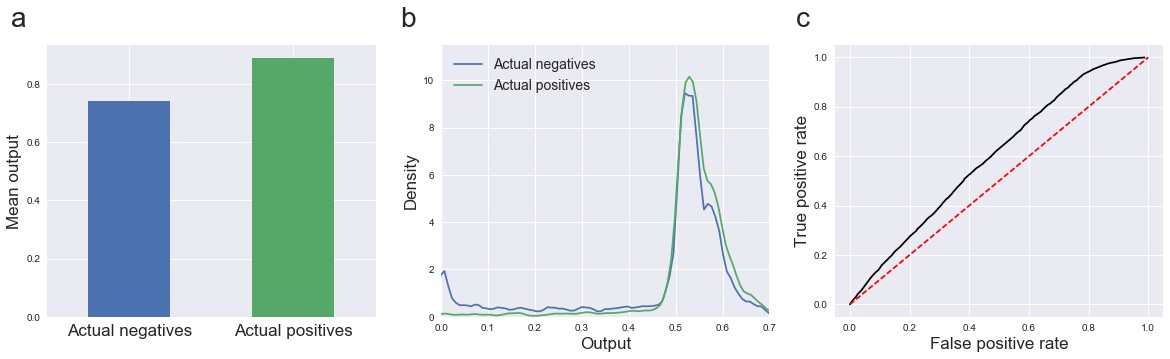

In [174]:
fig = plt.figure(figsize=[20, 5])


label_fs = 17

plt.subplot(1, 3, 2)
plot_df = pd.DataFrame({"pred": output_df.values.flatten(), "targ": target_df.values.flatten()})
plot_df["class"] = (plot_df["pred"] > 0.5).astype("float")

sbn.distplot(plot_df[plot_df["targ"] == 0]["pred"], hist=False, label="Actual negatives")
sbn.distplot(plot_df[plot_df["targ"] == 1]["pred"], hist=False, label="Actual positives")
plt.xlabel("Output", fontsize=label_fs)
plt.ylabel("Density", fontsize=label_fs)
plt.legend(fontsize=14)

plt.xlim([0, 0.7])
plt.ylim([0, 11.5])

plt.subplot(1, 3, 1)
plot_df.groupby("targ").mean()["class"].plot("bar")
plt.xlabel("")
plt.ylabel("Mean output", fontsize=label_fs)
plt.xticks([0, 1], ["Actual negatives", "Actual positives"], rotation=0, fontsize=label_fs)

plt.subplot(1, 3, 3)
fpr, tpr = roc_curve(target_df.values.flatten(), output_df.values.flatten())[:2]
plt.plot(fpr[::100], tpr[::100], "k")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False positive rate", fontsize=label_fs)
plt.ylabel("True positive rate", fontsize=label_fs)

height = 0.93
fig.text(0.1, height, "a", fontsize=28)
fig.text(0.37, height, "b", fontsize=28)
fig.text(0.645, height, "c", fontsize=28)

# plt.savefig("/Users/krisj/Documents/PhD/Projects/Thesis/Plots/Deep-learning/Prediction-plot.pdf", bbox_inches="tight")

## Metabolite predictions

In [179]:
res = results2[0]

output = np.array(res["best_epoch_output"])
predictions = output.round()
real_classes = np.array(res["real_classes"])

assert predictions.shape == real_classes.shape

output_df = pd.DataFrame(output[:, :, 1])[data_indices]
prediction_df = pd.DataFrame(predictions[:, :, 1])[data_indices]
target_df = pd.DataFrame(real_classes[:, :, 1])[data_indices]

In [180]:
met_bacs = []
good_mets = []
for col in target_df.columns:
    test_df = pd.DataFrame({"pred": output_df[col], "targ": target_df[col]})
    test_df["class"] = (test_df["pred"] > 0.5).astype("float")
    test_df = test_df.groupby("targ").mean()["class"]
    try:
        met_bac = (test_df[1] + (1-test_df[0]))/2
        if met_bac == 0.51:
            print(col, met_bac)
        
        if met_bac != 0.5:
            good_mets.append(col)
            met_bacs.append(met_bac)
    except KeyError:
        pass

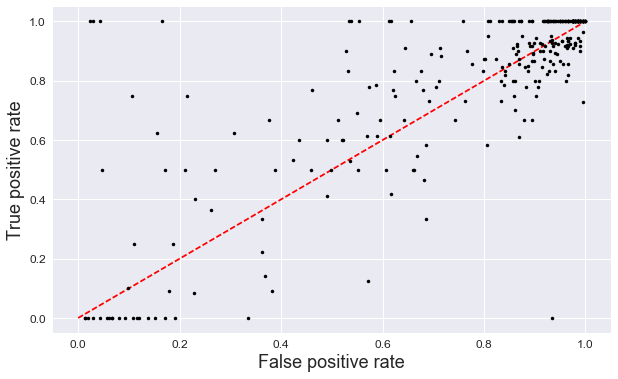

In [191]:
plt.figure(figsize=[10, 6])

cl = 1
dat = ((prediction_df == cl) & (target_df == cl)).sum(0) / (target_df == cl).sum(0)
#dat = dat[dat < 10]

met_tpr = dat

cl = 0
dat = ((prediction_df == cl) & (target_df == cl)).sum(0) / (target_df == cl).sum(0)
#dat = dat[dat < 10]

met_tnr = dat

plt.plot([0, 1], [0, 1], "r--")
plt.plot(1-met_tnr, met_tpr, "k.")
plt.xlabel("False positive rate", fontsize=18)
plt.ylabel("True positive rate", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(
    "/Users/krisj/Documents/PhD/Projects/Thesis/Plots/Deep-learning/Metabolite-performance.png",
    bbox_inches="tight",
    dpi=200
)

In [192]:
met_bacs.index(max(met_bacs))

47

/Users/krisj/anaconda/envs/cfb_old/lib/python3.4/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


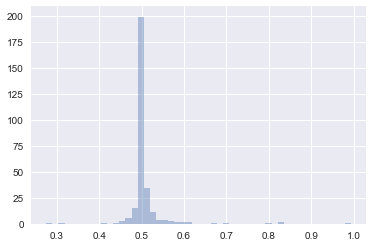

In [182]:
sbn.distplot(met_bacs, kde=False)

In [175]:
test_df.groupby("targ").mean()

,pred,class
targ,,
0.0,0.528037,0.995025
1.0,0.526649,1.000000


In [98]:
start = 168
print((tpr[start:] / fpr[start:]).max())
print((tpr[start:] / fpr[start:]).argmax())
print(tpr[start], fpr[start])

2.350481309519309
6
0.01634665282823041 0.007141019042717447


In [90]:
tpr[5], fpr[5]

(0.0007784120394395433, 0.00022516726711271231)

In [31]:
np.array(res["real_classes"]).sum(2).max(0).sum()

310.0

In [28]:
len(data_indices)

310

In [59]:
(predictions * real_classes).mean(0)

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
met_accs = (predictions == real_classes).mean(0)

In [67]:
predictions[:, data_indices].mean()

0.7697713160684537

In [68]:
real_classes[:, data_indices].mean()

0.9461002574587308

/Users/krisj/anaconda/envs/cfb_old/lib/python3.4/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


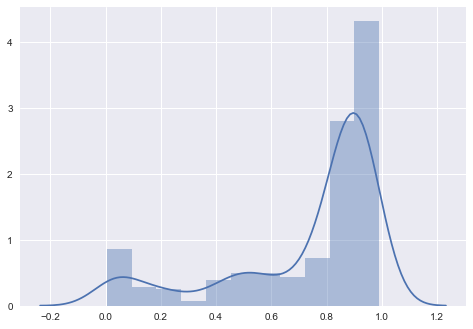

In [64]:
sbn.distplot([met_accs[i] for i in data_indices])

In [69]:
class ConfusionMatrix(object):
    def __init__(self, preds, reals):
        assert len(preds) == len(reals)
        self.preds = preds
        self.reals = reals
        classes = sorted(set(preds) | set(reals))
        mat = np.zeros([len(classes), len(classes)], dtype="int")
        for real, pred in zip(reals, preds):
            mat[classes.index(real), classes.index(pred)] += 1
        self.mat = mat     
            
    def __str__(self):
        return str(self.mat)
    
    def bac(self):
        return (self.mat.diagonal() / self.mat.sum(1)).mean()

In [74]:
met_bacs = []
for i in data_indices:
    b = ConfusionMatrix(predictions[:, i], real_classes[:, i]).bac()
    if b == b:
        met_bacs.append(b)

/Users/krisj/anaconda/envs/cfb_old/lib/python3.4/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


/Users/krisj/anaconda/envs/cfb_old/lib/python3.4/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


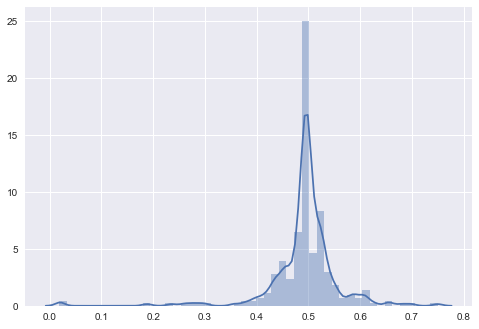

In [75]:
sbn.distplot(met_bacs)